<a href="https://colab.research.google.com/github/Schristiansen1995/EDA_ElFinansciero/blob/main/EDA_EL_FINANSCIERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de analisis exploratorio de datos (EDA)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Se importan las siguientes librerias

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Se invoca el dataset, en este caso es una base de datos con informacion de casas en una determinada ciudad.

In [ ]:
pd.set_option("display.max_columns", 200)

df_houses = pd.read_csv("/content/drive/MyDrive/El_Finansciero/train.csv")

df_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Aqui hay que aprender a identificar y diferenciar los datos discretos y continuos:

- Datos discretos: Son aquellos que solo pueden tomar valores específicos y no pueden subdividirse infinitamente. Normalmente se representan con números enteros.- Ejemplo: El número de clientes que visitan una tienda en un día (puede ser 10, 11, 12, pero no 10.5 clientes).

- Datos continuos: Son aquellos que pueden tomar cualquier valor dentro de un rango, incluyendo decimales, ya que pueden subdividirse infinitamente.- Ejemplo: La altura de una persona (puede ser 170 cm, 170.2 cm, 170.25 cm, etc.).


Los datos discretos suelen surgir en conteos, mientras que los continuos son comunes en mediciones.


### Se procede a realizar un conteo de datos, en este caso, filas por columnas

In [ ]:
df_houses.shape

(1460, 81)

### Si se desea saber la cantidad de datos repetidos en una columna, se puede realizar con la funcion Value_counts

In [ ]:
df_houses['MSZoning'].value_counts()

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


### Antes, se debe hacer un analisis de completitud: el cual tiene como finalidad verificar que no existan datos vacios en el DF

In [ ]:
Completitud = pd.DataFrame(df_houses.isnull().sum())
Completitud

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


### Se puede apreciar que la columna LotFrontage registra 259 datos nulos. Luego, se procede a crear un subdataset:

In [ ]:
Completitud.reset_index(inplace=True)
Completitud

,index,0
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


### Se procede a renombrar las columnas

In [ ]:
Completitud = Completitud.rename(columns={"index":"Columnas", 0:"total"})
Completitud

,Columnas,total
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


### Si se desea, se procede a sacar el porcentaje de la completitud:

In [ ]:
Completitud["Completitud"] = (1 - Completitud["total"] / df_houses.shape[0] * 100)
Completitud

,Columnas,total,Completitud
0,Id,0,1.000000
1,MSSubClass,0,1.000000
2,MSZoning,0,1.000000
3,LotFrontage,259,-16.739726
4,LotArea,0,1.000000
...,...,...,...
76,MoSold,0,1.000000
77,YrSold,0,1.000000
78,SaleType,0,1.000000
79,SaleCondition,0,1.000000


### Se procede a crearle un sort_values, para organizar de

In [ ]:
Completitud = Completitud.sort_values(by="Completitud", ascending=True)
Completitud.reset_index(drop=True, inplace=True)
Completitud

,Columnas,total,Completitud
0,PoolQC,1453,-98.520548
1,MiscFeature,1406,-95.301370
2,Alley,1369,-92.767123
3,Fence,1179,-79.753425
4,MasVnrType,872,-58.726027
...,...,...,...
76,MoSold,0,1.000000
77,YrSold,0,1.000000
78,SaleType,0,1.000000
79,SaleCondition,0,1.000000


### Se puede interpretar que, por ejemplo, la columna "PoolQC" tiene una completitud del -98%, es decir, casi no se tienen datos. Se recomienda eliminar las columnas cuyas columnas arrojan completitud negativa.

### Se procede a eliminar datos innecesarios

In [ ]:
df_houses = df_houses.drop(['Alley', 'PoolQC', 'Id', 'MiscFeature'], axis=1)
df_houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Luego, se procede a eliminar los datos duplicados:

In [ ]:
# Para saber si hay duplicados
duplicados = df_houses[df_houses.duplicated()]

duplicados

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
# Para quitar los duplicados
df_houses = df_houses.drop_duplicates()
df_houses.shape

(1460, 77)

### Se puede apreciar que no hay datos duplicados en el DF. Para estar 100%, se realiza un Shape:

In [ ]:
duplicados.shape

(0, 77)

### A continuacion, se busca la variable objetivo: Aquella columna que te arroja el resultado

In [ ]:
def renombrar_columnas(df_houses, columnas, prefix):
    """
    Esto es lo mismo que la siguiente línea:
        nuevos = []
        for columna in columnas:
            nuevos.append(prefix + columna)
    """
    nuevos = [prefix + columna for columna in columnas]
    df_houses = df_houses.rename(columns=dict(zip(columnas, nuevos)))
    return df_houses

In [ ]:
v_feats = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities",
    "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
    "HouseStyle", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "RoofStyle",
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
    "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "Heating", "HeatingQC", "CentralAir", "Electrical", "LowQualFinSF", "BsmtHalfBath",
    "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
    "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]

c_feats = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF",
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
    "BedroomAbvGr", "HalfBath", "GarageCars", "BsmtFullBath"]

tgt = ["SalePrice"]

df_houses = renombrar_columnas(df_houses, v_feats, "v_")
df_houses = renombrar_columnas(df_houses, c_feats, "c_")
df_houses = renombrar_columnas(df_houses, tgt, "tgt_")

In [ ]:
df_houses.head()

,v_MSSubClass,v_MSZoning,c_LotFrontage,c_LotArea,v_Street,v_LotShape,v_LandContour,v_Utilities,v_LotConfig,v_LandSlope,v_Neighborhood,v_Condition1,v_Condition2,v_BldgType,v_HouseStyle,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,v_RoofStyle,v_RoofMatl,v_Exterior1st,v_Exterior2nd,v_MasVnrType,c_MasVnrArea,v_ExterQual,v_ExterCond,v_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,c_BsmtFinSF1,v_BsmtFinType2,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,v_Heating,v_HeatingQC,v_CentralAir,v_Electrical,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,FullBath,c_HalfBath,c_BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,v_GarageType,v_GarageYrBlt,v_GarageFinish,c_GarageCars,c_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,v_Fence,c_MiscVal,v_MoSold,v_YrSold,v_SaleType,v_SaleCondition,tgt_SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Mi rey, una forma de filtrar es la siguiente:

In [ ]:
df_houses.filter(like="tgt_").head()

,tgt_SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### Se procede a realizar un analisis univariable, se toma la variable TGT

In [ ]:
df_houses.filter(like="tgt_").describe()

,tgt_SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


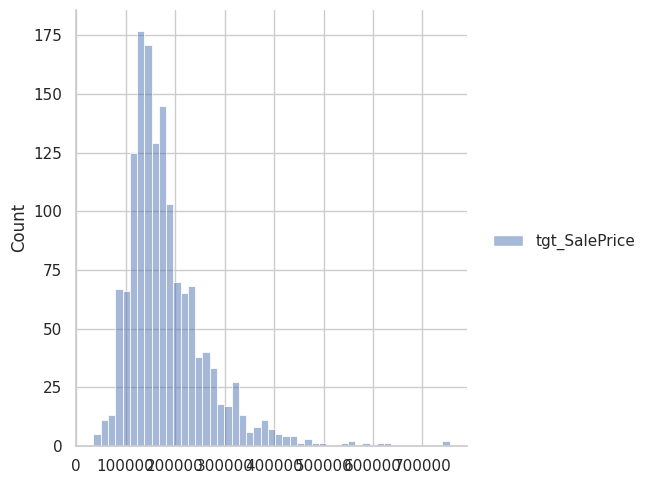

In [ ]:
sns.displot(df_houses.filter(like="tgt_"))

### Se procede a sacar la Kurtosis y la asimetria (calma rey, no te me embotes).
### Asimetria:Imagina que estás viendo una montaña (una gráfica de distribución de datos). Si esa montaña está perfectamente equilibrada a ambos lados (como una campana), decimos que no hay asimetría.

Pero si:

🔺 Tiene la "cola" más larga hacia la derecha, se dice que tiene asimetría positiva (los valores altos son más extremos o frecuentes).

🔻 Tiene la "cola" más larga hacia la izquierda, es asimetría negativa (hay más valores bajos alejados del promedio).

👉 ¿Para qué sirve?
Te dice si los datos están “inclinados” hacia algún lado. Esto es útil para saber si podrías tener valores extremos que afecten el análisis (por ejemplo, si el promedio no representa bien la tendencia general).

### Curtosis (Kurtosis)
### La curtosis te dice qué tan picuda o chata es la montaña.

Curtosis normal (mesocúrtica): La montaña tiene una forma de campana "normal" (como la distribución normal).

Curtosis alta (leptocúrtica): La montaña es muy alta y delgada — eso significa que hay más valores extremos (colas más pesadas).

Curtosis baja (platicúrtica): La montaña es más baja y ancha — los datos están más dispersos y con menos valores extremos.

👉 ¿Para qué sirve?
Te ayuda a entender si hay muchos valores muy alejados del promedio, lo cual puede ser importante en riesgos, errores de medición, o análisis financiero.

In [ ]:
print("Asimetria : ", df_houses["tgt_SalePrice"].skew())
print("Curtosis : ", df_houses["tgt_SalePrice"].kurt())

Asimetria :  1.8828757597682129
Curtosis :  6.536281860064529


### Se procede a concatenar

In [ ]:
datos = pd.concat([df_houses['tgt_SalePrice'], df_houses['c_LotArea']], axis=1 )
datos

,tgt_SalePrice,c_LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


<Axes: xlabel='c_LotArea', ylabel='tgt_SalePrice'>

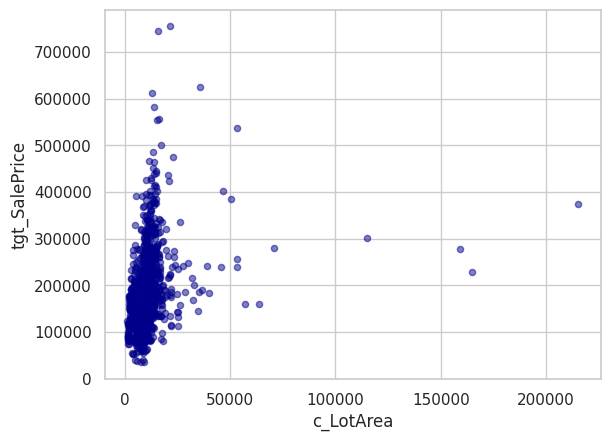

In [ ]:
datos.plot.scatter(x='c_LotArea', y='tgt_SalePrice', alpha = 0.5, c='DarkBlue')

### Se logra apreciar que existe un outlier (dato erroneo) en el cual para el area que tiene el lote, el precio esta muy por debajo.

In [ ]:
datos_2 = pd.concat([df_houses['tgt_SalePrice'], df_houses['c_GrLivArea']], axis=1 )
datos_2

,tgt_SalePrice,c_GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


<Axes: xlabel='c_GrLivArea', ylabel='tgt_SalePrice'>

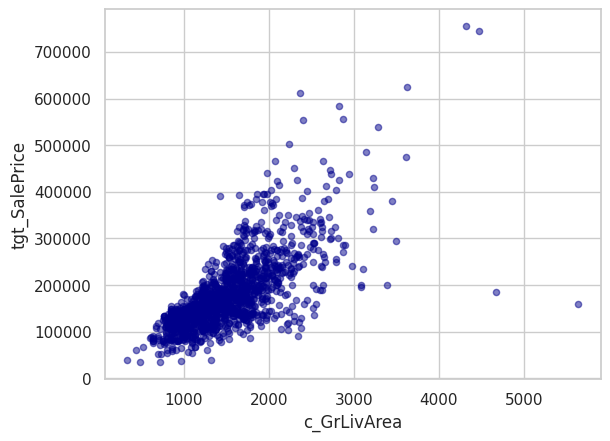

In [ ]:
datos_2.plot.scatter(x='c_GrLivArea', y='tgt_SalePrice', alpha = 0.5, c='DarkBlue')

In [ ]:
datos_3 = pd.concat([df_houses['tgt_SalePrice'], df_houses['v_OverallQual']], axis=1 )
datos_3

,tgt_SalePrice,v_OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


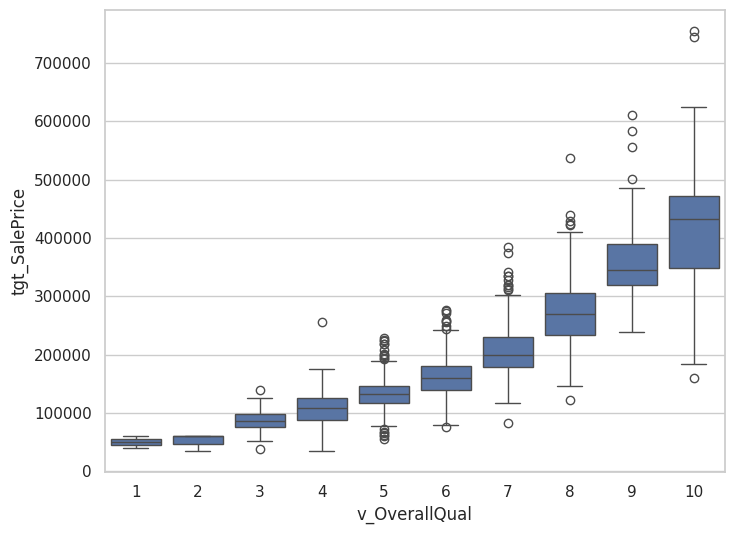

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='v_OverallQual', y='tgt_SalePrice', data=datos_3)

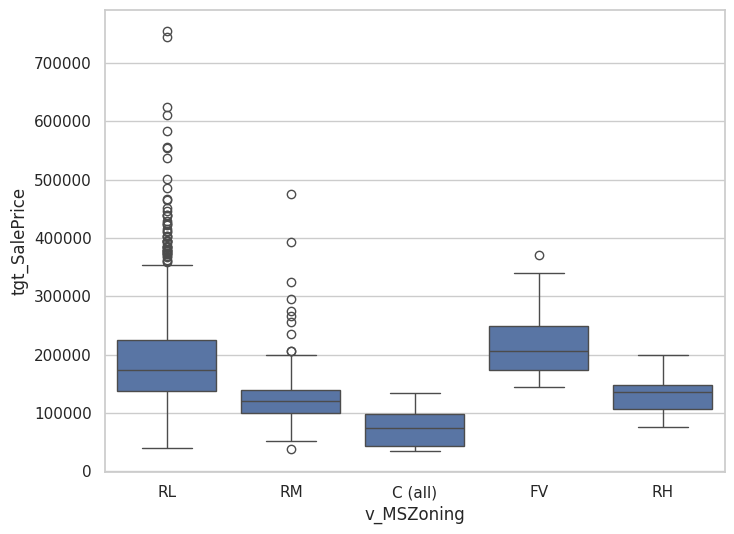

In [ ]:
datos_4 = pd.concat([df_houses['tgt_SalePrice'], df_houses['v_MSZoning']], axis=1 )
fig, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='v_MSZoning', y='tgt_SalePrice', data = datos_4)

In [ ]:
# Seleccionar solo columnas numéricas
df_numerico = df_houses.select_dtypes(include='number')

# Calcular matriz de correlación
correlacion = df_numerico.corr()

# Mostrar correlación con la variable objetivo ordenada
correlacion[['tgt_SalePrice']]\
    .sort_values(by='tgt_SalePrice', ascending=False)\
    .style.background_gradient(cmap='viridis')

,tgt_SalePrice
tgt_SalePrice,1.000000
v_OverallQual,0.790982
c_GrLivArea,0.708624
c_GarageCars,0.640409
c_GarageArea,0.623431
c_TotalBsmtSF,0.613581
c_1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
v_YearBuilt,0.522897


### Se procede a realizar una matriz de correlacion:

In [ ]:
corr = df_numerico.corr()
corr.style.background_gradient(cmap='coolwarm')

,v_MSSubClass,c_LotFrontage,c_LotArea,v_OverallQual,v_OverallCond,v_YearBuilt,v_YearRemodAdd,c_MasVnrArea,c_BsmtFinSF1,c_BsmtFinSF2,c_BsmtUnfSF,c_TotalBsmtSF,c_1stFlrSF,c_2ndFlrSF,v_LowQualFinSF,c_GrLivArea,c_BsmtFullBath,v_BsmtHalfBath,FullBath,c_HalfBath,c_BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,v_GarageYrBlt,c_GarageCars,c_GarageArea,c_WoodDeckSF,c_OpenPorchSF,c_EnclosedPorch,c_3SsnPorch,c_ScreenPorch,c_PoolArea,c_MiscVal,v_MoSold,v_YrSold,tgt_SalePrice
v_MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
c_LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
c_LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
v_OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
v_OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
v_YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
v_YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
c_MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
c_BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
c_BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.